In [65]:
import numpy as np
import mahotas
import json
import cv2
import matplotlib.pyplot as plt

In [66]:
DATASET_FOLDER = "/Users/jiehyun/kaggle/input/hubmap-organ-segmentation/"
TRAIN_IMAGES = DATASET_FOLDER + "train_images"
TRAIN_ANNOT = DATASET_FOLDER + "train_annotations"
TRAIN_CSV = DATASET_FOLDER + "train.csv"

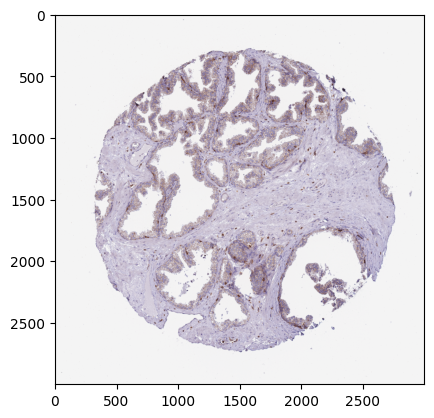

In [67]:
img = mahotas.imread(TRAIN_IMAGES + '/10044.tiff')
plt.imshow(img)

In [68]:
with open(TRAIN_ANNOT + '/10044.json') as json_file:
    data = json.load(json_file)

In [48]:
len(data)

9

In [49]:
print(len(data[0]))
print(len(data[1]))
print(len(data[2]))
print(len(data[3]))
print(len(data[4]))
print(len(data[5]))
print(len(data[6]))
print(len(data[7]))
print(len(data[8]))

101
93
108
70
75
53
45
320
140


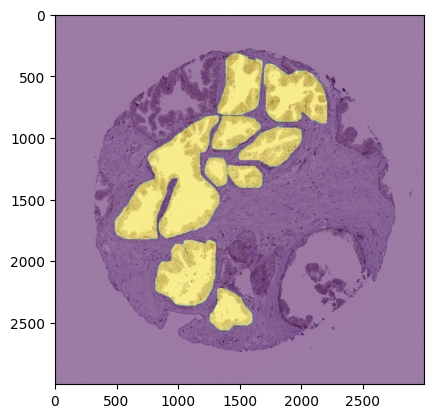

In [64]:
#reference1: https://github.com/maftouni/binary_mask_from_json/blob/main/binary_mask_from_json.py
#reference2: https://www.kaggle.com/code/soymilkk/hubmap-unet
x_val = []
y_val = []
for i in range(len(data)):
    for j in range(len(data[i])):        
        shape1_x=data[i][j][0]
        shape1_y=data[i][j][1]
        x_val.append(shape1_x)
        y_val.append(shape1_y)

fig = plt.figure()

plt.imshow(img.astype(np.uint8)) 
#plt.scatter(x_val, y_val, zorder=2, color='red', marker = '.', alpha= 0.2)

mask = np.zeros((img.shape[0],img.shape[1]))
for i in range(len(data)):
    img2=cv2.drawContours(mask, [np.array(data[i])], -1, (255, 255, 255), -1)

plt.imshow(img)
plt.imshow(img2, alpha = 0.5)
plt.show()

#cv2.imwrite('10044.png', img3)